In [ ]:
# Install arcpy

# conda install -c esri arcpy
# https://anaconda.org/esri/arcpy
# https://www.esri.com/en-us/arcgis/products/arcgis-python-libraries/overview


In [ ]:
# ArcGIS API for Python

# conda install -c esri arcgis

In [41]:
import matplotlib.pyplot as plt
#import seaborn as sns
import pandas as pd
import json
import numpy as np

#import arcpy

Potential Sources:
- Landsat-8
- Sentinel-2
- Planet Dove
- Worldview-2

Cairns AUS coordinates 

- 16.9203° S, 145.7710° E

### Landsat-8/9

https://landsat.gsfc.nasa.gov/data/
https://landsat.gsfc.nasa.gov/data/how-to-use-data/





### Worldview Data access

https://earth.esa.int/eogateway/catalog/worldview-3-full-archive-and-tasking

Some archived data available

First install of some of the libraries didn't work - make a new environment and try again

In [ ]:
#conda create -n geo_env
#conda activate geo_env
#conda config --env --add channels conda-forge
#conda config --env --set channel_priority strict
#conda install python=3 geopandas

In [ ]:
 # conda install pandas numpy matplotlib scikit-learn jupyter notebook

In [ ]:
# conda install geopandas
# conda install -c conda-forge folium
# conda install -c conda-forge glob2



In [2]:
import pandas as pd
import geopandas as gpd
import folium
import os, shutil
from glob import glob
import pyproj
from shapely import geometry
import matplotlib.pyplot as plt

%matplotlib inline

In [9]:
# Center map on Cairnes
map_center = [-16.9203, 145.7710]


[-16.9203, 145.771]

In [11]:
m = folium.Map(location=map_center, zoom_start=8, control_scale=True)
#folium.PolyLine(coords[::-1].T).add_to(m)
folium.LatLngPopup().add_to(m)
m

https://earthexplorer.usgs.gov/

Pulygot of Honduras reef

15 20 05 N 082 13 54 W
15 22 05 N 082 51 46 W
14 53 10 N 82 51 46 W
14 53 10 N 082 13 54 W


In [4]:
honduras_map_center = [15.33, -85.5]
m = folium.Map(location=honduras_map_center, zoom_start=8, control_scale=True)
#folium.PolyLine(coords[::-1].T).add_to(m)
folium.LatLngPopup().add_to(m)
m



Read satellite json

In [10]:
df = pd.read_json('sat_data.json')

In [11]:
df.head()

,LANDSAT_METADATA_FILE
IMAGE_ATTRIBUTES,"{'SPACECRAFT_ID': 'LANDSAT_9', 'SENSOR_ID': 'O..."
LEVEL1_MIN_MAX_PIXEL_VALUE,"{'QUANTIZE_CAL_MAX_BAND_1': '65535', 'QUANTIZE..."
LEVEL1_MIN_MAX_RADIANCE,"{'RADIANCE_MAXIMUM_BAND_1': '781.75171', 'RADI..."
LEVEL1_MIN_MAX_REFLECTANCE,"{'REFLECTANCE_MAXIMUM_BAND_1': '1.210700', 'RE..."
LEVEL1_PROCESSING_RECORD,{'ORIGIN': 'Image courtesy of the U.S. Geologi...


In [12]:

import georasters as gr
import pandas
myRaster = 'sentinel2_honduras.tiff'

ModuleNotFoundError: No module named 'georasters'

In [13]:
import netCDF4 as nc


In [14]:
fn = 'ocean_temp.nc'
ds = nc.Dataset(fn)


In [15]:
ds

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_CLASSIC data model, file format NETCDF3):
    title: NOAA Optimum Interpolation (OI) SST V2
    Conventions: CF-1.0
    history: Created 10/2002 by RHS
    comments: Data described in  Reynolds, R.W., N.A. Rayner, T.M.
Smith, D.C. Stokes, and W. Wang, 2002: An Improved In Situ and Satellite
SST Analysis for Climate, J. Climate
    platform: Model
    source: NCEP Climate Modeling Branch
    institution: National Centers for Environmental Prediction
    References: https://www.psl.noaa.gov/data/gridded/data.noaa.oisst.v2.html
    NCO: 4.0.0
    dataset_title: NOAA Optimum Interpolation (OI) SST V2
    source_url: http://www.emc.ncep.noaa.gov/research/cmb/sst_analysis/
    dimensions(sizes): lat(180), lon(360), time(1676), nbnds(2)
    variables(dimensions): float32 lat(lat), float32 lon(lon), int16 sst(time, lat, lon), float64 time(time), float64 time_bnds(time, nbnds)
    groups: 

In [22]:
from matplotlib import pyplot as plt # import libraries
import pandas as pd # import libraries
import netCDF4 # import libraries


In [23]:
fp='ocean_temp.nc' # your file name with the eventual path


In [24]:
nc = netCDF4.Dataset(fp) # reading the nc file and creating Dataset


TypeError: Invalid shape (1676, 180, 360) for image data

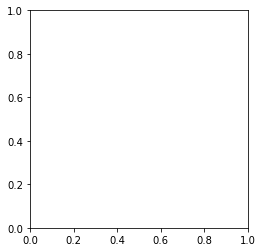

In [26]:
""" in this dataset each component will be 
in the form nt,nz,ny,nx i.e. all the variables will be flipped. """
plt.imshow(nc['sst'][1,:,0,:]) 
""" imshow is a 2D plot function
according to what I have said before this will plot the second
iteration of the vertical slize with y = 0, one of the vertical
boundaries of your model. """
plt.show() # this shows the plot

In [19]:
file2read = netCDF4.Dataset('ocean_temp.nc')
vars = file2read.variables  # access a variable in the file

In [20]:
vars

{'lat': <class 'netCDF4._netCDF4.Variable'>
 float32 lat(lat)
     units: degrees_north
     long_name: Latitude
     actual_range: [ 89.5 -89.5]
     standard_name: latitude
     axis: Y
     coordinate_defines: center
 unlimited dimensions: 
 current shape = (180,)
 filling on, default _FillValue of 9.969209968386869e+36 used,
 'lon': <class 'netCDF4._netCDF4.Variable'>
 float32 lon(lon)
     units: degrees_east
     long_name: Longitude
     actual_range: [  0.5 359.5]
     standard_name: longitude
     axis: X
     coordinate_defines: center
 unlimited dimensions: 
 current shape = (360,)
 filling on, default _FillValue of 9.969209968386869e+36 used,
 'sst': <class 'netCDF4._netCDF4.Variable'>
 int16 sst(time, lat, lon)
     long_name: Weekly Mean of Sea Surface Temperature
     unpacked_valid_range: [-5. 40.]
     actual_range: [-1.8  36.16]
     units: degC
     add_offset: 0.0
     scale_factor: 0.01
     missing_value: 32767
     precision: 2
     least_significant_digit: 2
   

In [27]:
from netCDF4 import Dataset


In [28]:
my_example_nc_file = 'ocean_temp.nc'
fh = Dataset(my_example_nc_file, mode='r')



In [29]:
lons = fh.variables['lon'][:]
lats = fh.variables['lat'][:]
sst = fh.variables['sst'][:]
time = fh.variables['time'][:]

In [35]:
import matplotlib.pyplot as plt


In [30]:
fh.close()


In [36]:
import mpl_toolkits

In [37]:
from mpl_toolkits.basemap import Basemap


ModuleNotFoundError: No module named 'mpl_toolkits.basemap'

In [ ]:
# Get some parameters for the Stereographic Projection
lon_0 = lons.mean()
lat_0 = lats.mean()

m = Basemap(width=5000000,height=3500000,
            resolution='l',projection='stere',\
            lat_ts=40,lat_0=lat_0,lon_0=lon_0)

NameError: name 'Basemap' is not defined

In [42]:
# Because our lon and lat variables are 1D,
# use meshgrid to create 2D arrays
# Not necessary if coordinates are already in 2D arrays.
lon, lat = np.meshgrid(lons, lats)
xi, yi = m(lon, lat)

TypeError: 'Map' object is not callable